# POLYNOMIAL LASSO REGRESSION

## 0. Imports

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import metrics as mt
from sklearn import linear_model as lm
from sklearn import preprocessing as pp

## 1. Load Datasets

In [2]:
# Train Datasets
dataset_path = '../../datasets/regression/X_training.csv'
x_train = pd.read_csv(dataset_path)
dataset_path2 = '../../datasets/regression/y_training.csv'
y_train = pd.read_csv(dataset_path2)

# Test Datasets
dataset_path3 = '../../datasets/regression/X_test.csv'
x_test = pd.read_csv(dataset_path3)
dataset_path4 = '../../datasets/regression/y_test.csv'
y_test = pd.read_csv(dataset_path4)

# Validation Datasets
dataset_path5 = '../../datasets/regression/X_validation.csv'
x_val = pd.read_csv(dataset_path5)
dataset_path6 = '../../datasets/regression/y_val.csv'
y_val = pd.read_csv(dataset_path6)

## 2. Polynomial Lasso Regression

### 2.1 Fine Tunning

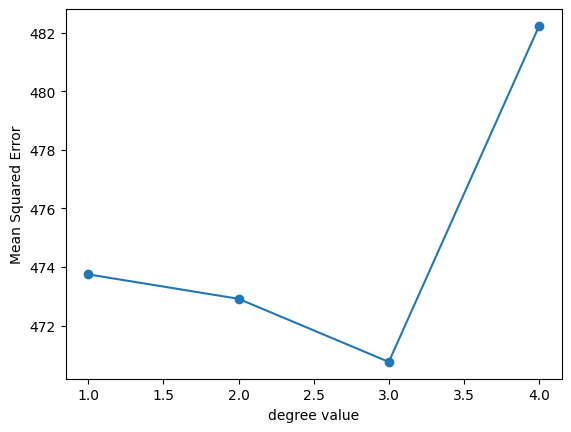

Best degree: 3


In [3]:
# Find Best degree Hyperparameter for Validation Data
d = np.arange(1, 5)
mse_list = []

for i in d:
    poly = pp.PolynomialFeatures(degree=i)
    x_poly_train = poly.fit_transform(x_train)
    x_poly_val = poly.transform(x_val)

    lasso = lm.Lasso(alpha=1, max_iter=1000)
    lasso.fit(x_poly_train, y_train)
    y_poly_val = lasso.predict(x_poly_val)

    mse = mt.mean_squared_error(y_val, y_poly_val)
    mse_list.append(mse)

plt.plot(d, mse_list, '-o')
plt.xlabel('degree value')
plt.ylabel('Mean Squared Error')
plt.show();

best_degree = d[np.argmin(mse_list)]
print(f"Best degree: {best_degree}")

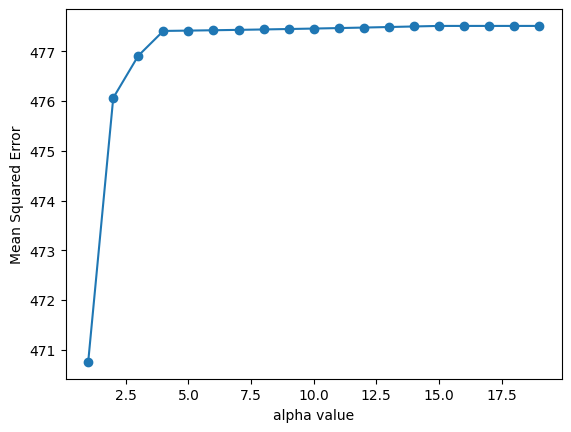

Best alpha: 1


In [4]:
# Find Best alpha Hyperparameter for Validation Data
a = np.arange(1, 20, 1)
mse_list = []

for i in a:
    poly = pp.PolynomialFeatures(degree=3)
    x_poly_train = poly.fit_transform(x_train)
    x_poly_val = poly.transform(x_val)
    
    lasso = lm.Lasso(alpha=i, max_iter=1000)
    lasso.fit(x_poly_train, y_train)
    yhat_lasso = lasso.predict(x_poly_val)

    mse = mt.mean_squared_error(y_val, yhat_lasso)
    mse_list.append(mse)

plt.plot(a, mse_list, '-o')
plt.xlabel('alpha value')
plt.ylabel('Mean Squared Error')
plt.show();

best_alpha = a[np.argmin(mse_list)]
print(f"Best alpha: {best_alpha}")

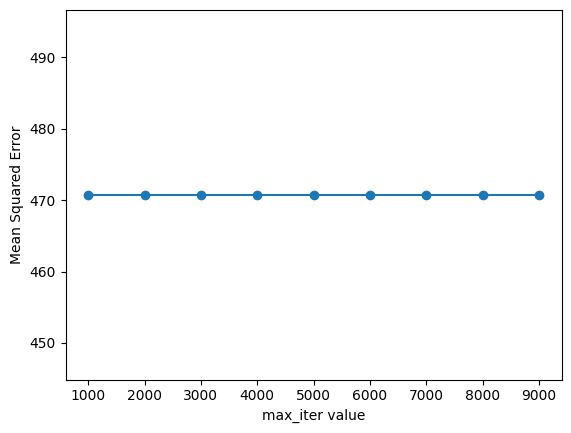

Best max_iter: 1000


In [5]:
# Find Best max_iter Hyperparameter for Validation Data
m = np.arange(1000, 10000, 1000)
mse_list = []

for i in m:   
    poly = pp.PolynomialFeatures(degree=3)
    x_poly_train = poly.fit_transform(x_train)
    x_poly_val = poly.transform(x_val)
    
    lasso = lm.Lasso(alpha=1, max_iter=i)
    lasso.fit(x_poly_train, y_train)
    yhat_lasso = lasso.predict(x_poly_val)

    mse = mt.mean_squared_error(y_val, yhat_lasso)
    mse_list.append(mse)

plt.plot(m, mse_list, '-o')
plt.xlabel('max_iter value')
plt.ylabel('Mean Squared Error')
plt.show();

best_max_iter = m[np.argmin(mse_list)]
print(f"Best max_iter: {best_max_iter}")

### 2.2 Final Model Training and Evaluation

In [6]:
# Predict Train with Best Hyperparameters Found
poly = pp.PolynomialFeatures(degree=3)
x_poly_train = poly.fit_transform(x_train)

lasso = lm.Lasso(alpha=1, max_iter=1000)
lasso.fit(x_poly_train, y_train)
yhat_train = lasso.predict(x_poly_train)

# Performance Metrics
r2_train = mt.r2_score(y_train, yhat_train)
mse_train = mt.mean_squared_error(y_train, yhat_train)
rmse_train = np.sqrt(mse_train)
mae_train = mt.mean_absolute_error(y_train, yhat_train)
mape_train = mt.mean_absolute_percentage_error(y_train, yhat_train)

print(f"Train R2 Square: {r2_train}")
print(f"Train MSE: {mse_train}")
print(f"Train RMSE: {rmse_train}")
print(f"Train MAE: {mae_train}")
print(f"Train MAPE: {mape_train}%")

Train R2 Square: 0.014083684053732282
Train MSE: 471.28038211134646
Train RMSE: 21.70899311601868
Train MAE: 17.229625360504706
Train MAPE: 8.648566001747445%


In [7]:
# Predict Validation with Best Hyperparameters Found
poly = pp.PolynomialFeatures(degree=3)
x_poly_train = poly.fit_transform(x_train)
x_poly_val = poly.transform(x_val)

lasso = lm.Lasso(alpha=1, max_iter=1000)
lasso.fit(x_poly_train, y_train)
yhat_val = lasso.predict(x_poly_val)

# Performance Metrics
r2_val = mt.r2_score(y_val, yhat_val)
mse_val = mt.mean_squared_error(y_val, yhat_val)
rmse_val = np.sqrt(mse_val)
mae_val = mt.mean_absolute_error(y_val, yhat_val)
mape_val = mt.mean_absolute_percentage_error(y_val, yhat_val)

print(f"Validation R2 Square: {r2_val}")
print(f"Validation MSE: {mse_val}")
print(f"Validation RMSE: {rmse_val}")
print(f"Validation MAE: {mae_val}")
print(f"Validation MAPE: {mape_val}%")

Validation R2 Square: 0.014148018445439225
Validation MSE: 470.75576886263883
Validation RMSE: 21.69690689620617
Validation MAE: 17.18059540921976
Validation MAPE: 8.655827568999914%


In [8]:
# Predict Test with Best Hyperparameters Found
poly = pp.PolynomialFeatures(degree=3)
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.transform(x_test)

lasso = lm.Lasso(alpha=1, max_iter=1000)
lasso.fit(x_poly_train, y_train)
yhat_test = lasso.predict(x_poly_test)

# Performance Metrics
r2_test = mt.r2_score(y_test, yhat_test)
mse_test = mt.mean_squared_error(y_test, yhat_test)
rmse_test = np.sqrt(mse_test)
mae_test = mt.mean_absolute_error(y_test, yhat_test)
mape_test = mt.mean_absolute_percentage_error(y_test, yhat_test)

print(f"Test R2 Square: {r2_test}")
print(f"Test MSE: {mse_test}")
print(f"Test RMSE: {rmse_test}")
print(f"Test MAE: {mae_test}")
print(f"Test MAPE: {mape_test}%")

Test R2 Square: -0.0037283440532349665
Test MSE: 488.71631024506434
Test RMSE: 22.106929009816454
Test MAE: 17.445044657132794
Test MAPE: 8.756115189330911%
